In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV
import csv

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

### Read from telco_churn csv file

In [2]:
customer_df = pd.read_csv('telco_churn.csv')

### Dataframe

In [3]:
customer_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Description of the data in the Customer Dataframe

In [4]:
customer_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Print information about Customer DataFrame including the index dtype and columns, non-null values and memory usage.

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Checking for NULL Values in Customer Dataframe

In [6]:
customer_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Checking for Datatypes in Customer Dataframe

In [7]:
customer_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<h3>Distribution in Churn in Customer Dataframe</h3>

In [8]:
customer_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
def plot_percent(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

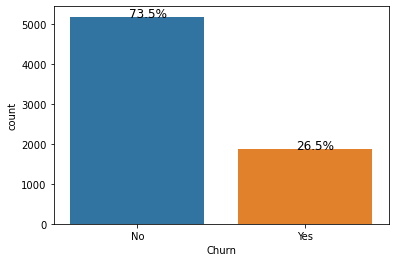

In [10]:
ax=sns.countplot(x=customer_df['Churn'], data=customer_df)
plot_percent(ax, customer_df["Churn"])

<h3>There is actually null values in Total Charges thats why it appeared as an object datatype. To solve this, we converted the column to float datatype and checked for NULL values.</h3>

In [11]:
customer_df['TotalCharges'] = pd.to_numeric(customer_df['TotalCharges'], errors = 'coerce')

In [12]:
customer_df['TotalCharges'].isna().sum()

11

### Fill Null values in Total Charges with Mean of Total Charges

In [13]:
customer_df['TotalCharges'] = customer_df['TotalCharges'].fillna(customer_df['TotalCharges'].mean())

In [14]:
customer_df['TotalCharges'].isna().sum()

0

<h3>Clean data for column MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies</h3>

In [15]:
# check
for i in customer_df.columns:
    print(i,':',pd.unique(customer_df[i]))

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

In [16]:
variables = ['MultipleLines','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [17]:
dict_variables={'No internet service':'No',
              'No phone service' : 'No',
              'No':'No',
              'Yes':'Yes'}
customer_df[variables]=customer_df[variables].apply(lambda x:x.map(dict_variables))

# check
for i in customer_df.columns:
    print(i,':',pd.unique(customer_df[i]))

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ... 

### Heatmap to display correlation of variables

<AxesSubplot:>

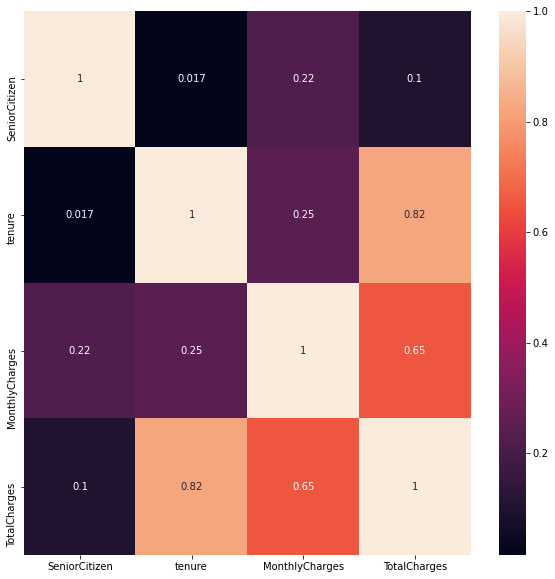

In [18]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(customer_df.corr(), annot=True)

<h3>Histogram of Tenure, Monthly Charges and Total Charges</h3>

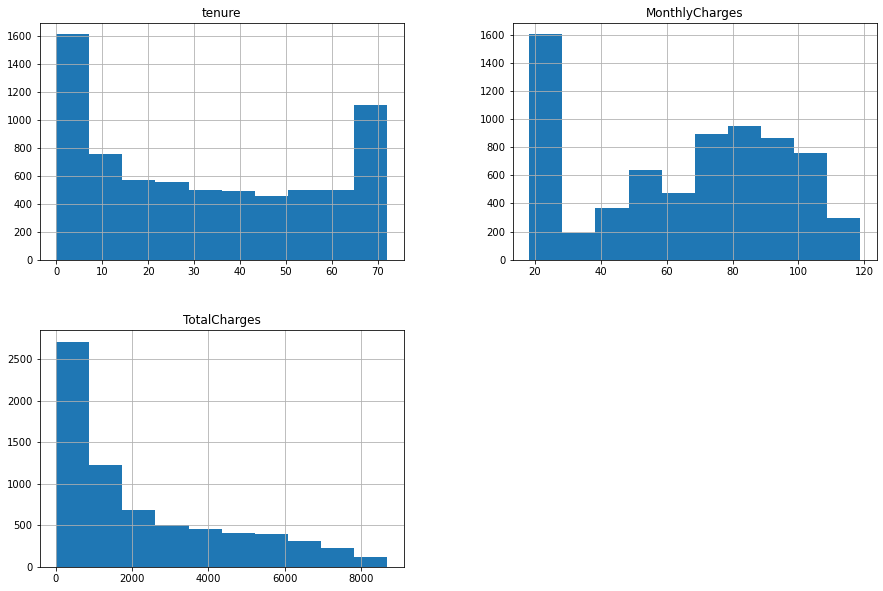

In [19]:
customer_df[["tenure","MonthlyCharges","TotalCharges"]].hist(figsize=(15,10))
plt.show()

<h3>Count Plot for columns “Gender”, “SeniorCitizen”, “Partner”, “Dependents”, “PhoneService”, “MultipleLines”, “InternetService”, “OnlineSecurity”, “OnlineBackup”, “DeviceProtection”, “TechSupport”, “StreamingTV”, “StreamingMovies”, “Contract”, “PaperlessBilling”, “PaymentMethod”</h3>

In [20]:
for_countplot_df = customer_df.drop(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1)

In [21]:
for_countplot_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


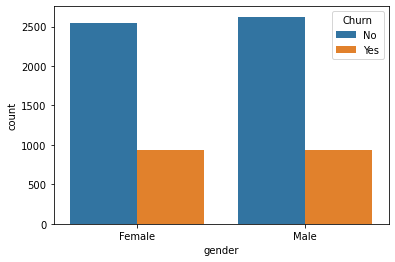

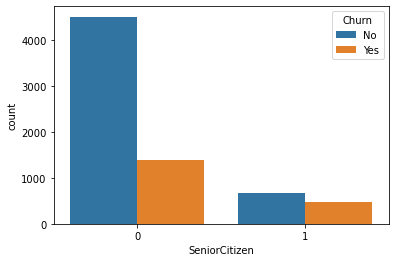

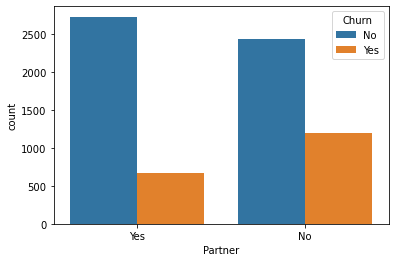

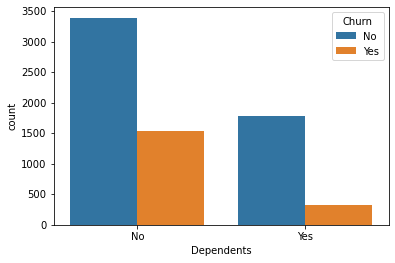

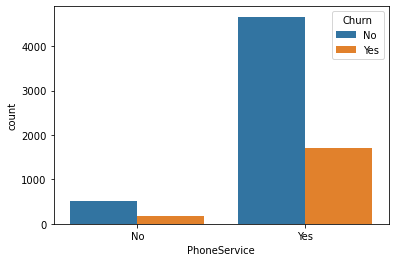

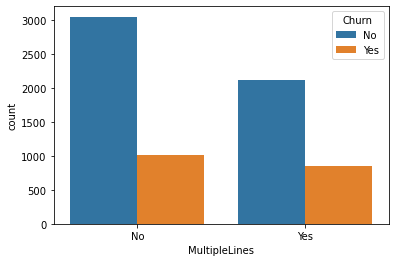

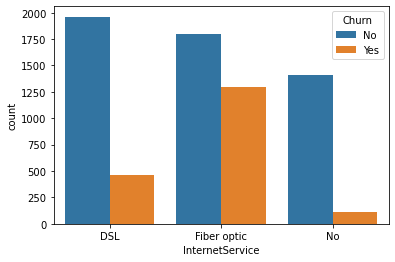

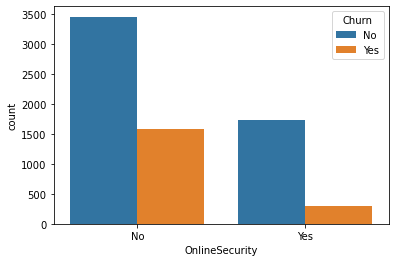

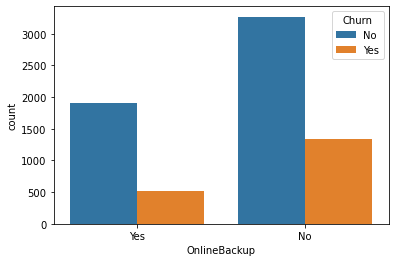

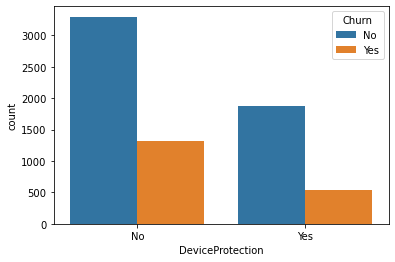

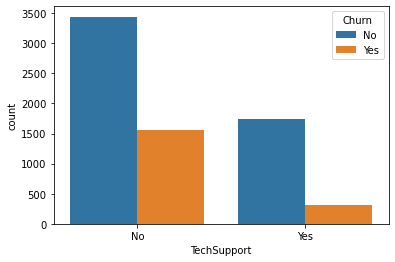

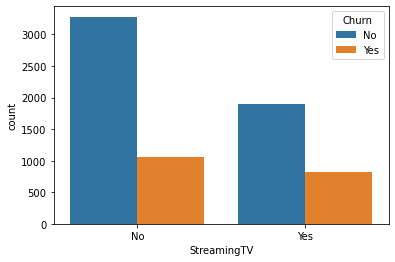

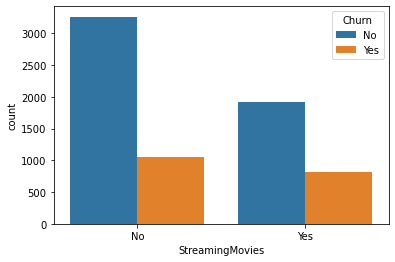

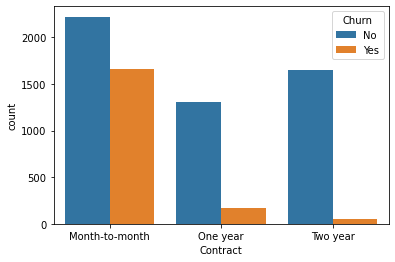

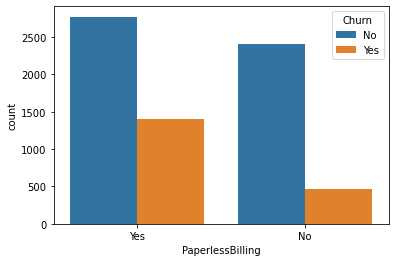

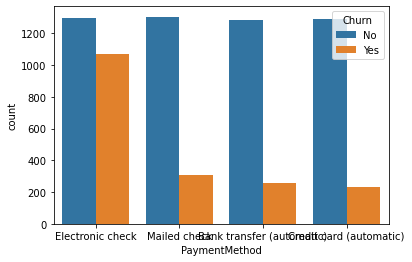

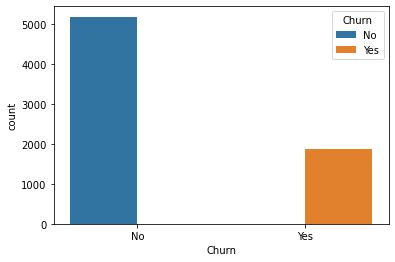

In [22]:
for i in for_countplot_df.columns:
    sns.countplot(x=for_countplot_df[i], hue='Churn', data=for_countplot_df)
    plt.show()
# sns.countplot(x='', hue='', data=customer_df)

<h3>We can see that gender has approximately equal Yes and No. So we will be dropping this column as well.</h3>

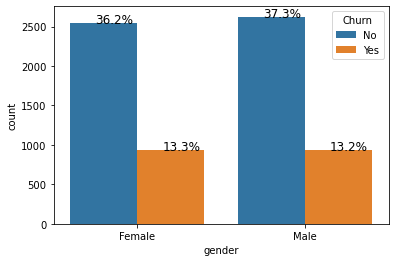

In [23]:
ax= sns.countplot(x=for_countplot_df['gender'], hue='Churn', data=for_countplot_df)

plot_percent(ax, for_countplot_df["gender"])

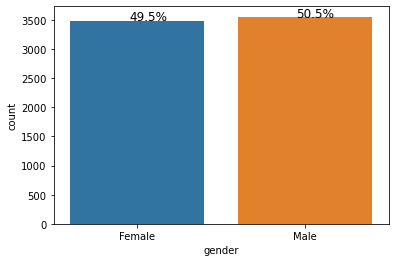

In [24]:
ax= sns.countplot(x=for_countplot_df['gender'], data=for_countplot_df)

plot_percent(ax, for_countplot_df["gender"])

In [25]:
customer_df.groupby('gender')['Churn'].value_counts()

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: Churn, dtype: int64

<h3>Box Plot</h3>

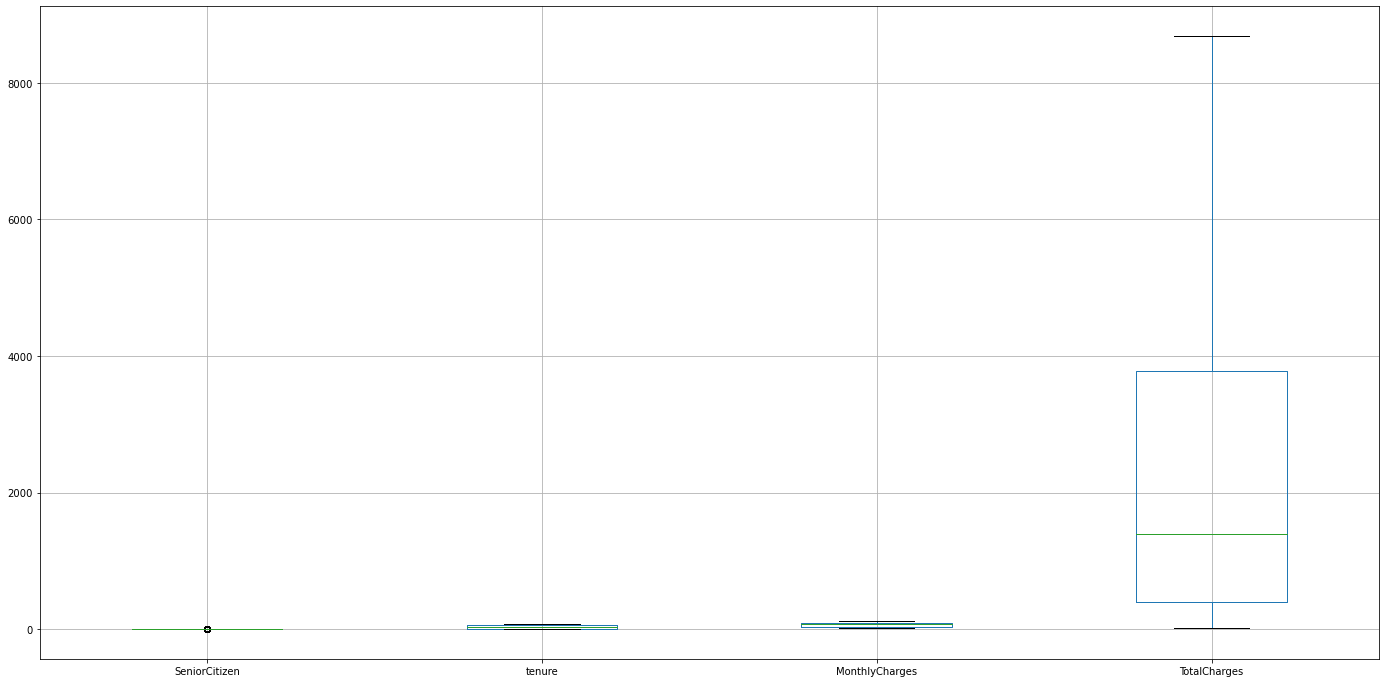

In [28]:
customer_df.boxplot(figsize=(24,12))
plt.show()

<h3>Drop customerID and gender because will not be useful based on initial analysis</h3>

In [46]:
customer_df = customer_df.drop(columns={'customerID', 'gender'}) 

In [47]:
customer_df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<h3>We will now be doing the One hot encoding & Label encoding for our dataset</h3>

<h3>Label Encoding for Yes/No values</h3>

In [48]:
categorized_features=['SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# categorized_features=['SeniorCitizen', 'Partner', 'Dependents',
#         'PhoneService', 'MultipleLines', 'InternetService',
#        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
#        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
#        'PaymentMethod']

le=LabelEncoder()
for i in categorized_features:
    customer_df[i] = le.fit_transform(customer_df[i])

In [49]:
customer_df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


<h3>One Hot encoding for variable that are non-binary</h3>

In [50]:
from sklearn.preprocessing import LabelBinarizer

onehot_features=['InternetService', 'Contract', 'PaymentMethod']
    
labelbinarizer = LabelBinarizer()

for i in onehot_features:
    x = labelbinarizer.fit_transform(customer_df[i])
    encoded_df = pd.DataFrame(x, columns=labelbinarizer.classes_)
    customer_df = pd.concat([customer_df, encoded_df], axis=1)

customer_df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,1,0,1,0,0,DSL,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,DSL,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,DSL,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,DSL,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,Fiber optic,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,DSL,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,1,1,72,1,1,Fiber optic,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,1,1,11,0,0,DSL,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,4,1,1,Fiber optic,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [51]:
customer_df = customer_df.drop(columns={'InternetService', 'Contract', 'PaymentMethod'})

In [52]:
customer_df.rename(columns = {'DSL':'internet_service_dsl', 'Fiber optic':'internet_service_fiber_optic', 'No':'internet_service_no'}, inplace = True)

In [53]:
customer_df.rename(columns = {'Month-to-month':'contract_month_to_month', 'One year':'contract_one_year', 'Two year':'contract_two_year'}, inplace = True)

In [54]:
customer_df.rename(columns = {'Bank transfer (automatic)':'payment_method_bank_transfer', 'Credit card (automatic)':'payment_method_credit_card', 'Electronic check':'payment_method_electronic_check', 'Mailed check':'payment_method_mailed_check'}, inplace = True)

In [55]:
customer_df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,internet_service_dsl,internet_service_fiber_optic,internet_service_no,contract_month_to_month,contract_one_year,contract_two_year,payment_method_bank_transfer,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,1,1,72,1,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
7040,0,1,1,11,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,4,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


### Looking at new values in customer dataframe after label and one-hot encoding

In [56]:
for i in customer_df.columns:
    print(i,':',pd.unique(customer_df[i]))

SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
internet_service_dsl : [1 0]
internet_service_fiber_optic : [0 1]
internet_service_no : [0 1]
contract_month_to_month : [1 0]
contract_one_year : [0 1]
contract_two_year : [0 1]
payment_method_bank_transfer : [0 1]
payment_method_credit_card : [0 1]
payment_method_electronic_check : [1 0]
payment_method_mailed_check : [0 1]


array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'Partner'}>,
        <AxesSubplot:title={'center':'Dependents'}>,
        <AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'PhoneService'}>],
       [<AxesSubplot:title={'center':'MultipleLines'}>,
        <AxesSubplot:title={'center':'OnlineSecurity'}>,
        <AxesSubplot:title={'center':'OnlineBackup'}>,
        <AxesSubplot:title={'center':'DeviceProtection'}>,
        <AxesSubplot:title={'center':'TechSupport'}>],
       [<AxesSubplot:title={'center':'StreamingTV'}>,
        <AxesSubplot:title={'center':'StreamingMovies'}>,
        <AxesSubplot:title={'center':'PaperlessBilling'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>],
       [<AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'internet_service_dsl'}>,
        <AxesSubplot:title={'center':'internet_service_fibe

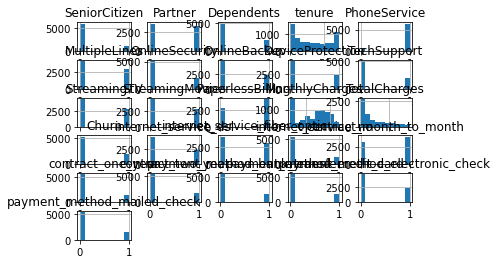

In [57]:
customer_df.hist()

### Normalise (Scale) Data using MinMaxScaler()

In [59]:
scaler = MinMaxScaler()

customer_df.iloc[:,3:4] = scaler.fit_transform(customer_df.iloc[:,3:4])
customer_df.iloc[:,13:15] = scaler.fit_transform(customer_df.iloc[:,13:15])
customer_df[["tenure","TotalCharges","MonthlyCharges"]]

,tenure,TotalCharges,MonthlyCharges
0,0.013889,0.001275,0.115423
1,0.472222,0.215867,0.385075
2,0.027778,0.010310,0.354229
3,0.625000,0.210241,0.239303
4,0.027778,0.015330,0.521891
...,...,...,...
7038,0.333333,0.227521,0.662189
7039,1.000000,0.847461,0.845274
7040,0.152778,0.037809,0.112935
7041,0.055556,0.033210,0.558706


### Feature Selection using Feature Importance Score derived from Random Forest Classifier

In [60]:
X = customer_df.drop(columns={'Churn'})
y = customer_df['Churn']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 424)

In [62]:
clf = RandomForestClassifier(n_estimators=100, random_state=424)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=424)

In [63]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

TotalCharges                       0.192492
MonthlyCharges                     0.179899
tenure                             0.169964
contract_month_to_month            0.065256
internet_service_fiber_optic       0.040560
payment_method_electronic_check    0.030713
PaperlessBilling                   0.025939
Partner                            0.023840
OnlineSecurity                     0.021904
OnlineBackup                       0.021706
SeniorCitizen                      0.021550
contract_two_year                  0.020227
Dependents                         0.020028
TechSupport                        0.019550
MultipleLines                      0.018879
DeviceProtection                   0.017965
StreamingTV                        0.016970
StreamingMovies                    0.016677
payment_method_credit_card         0.013040
payment_method_bank_transfer       0.012714
internet_service_no                0.012160
payment_method_mailed_check        0.011669
internet_service_dsl            

### Feature Selection using Chi Square P-Values

In [64]:
from sklearn.feature_selection import chi2

chi_scores = chi2(X,y)

In [65]:
chi_scores

(array([1.34351545e+02, 8.24120826e+01, 1.33036443e+02, 2.26096162e+02,
        9.72606249e-02, 6.54851159e+00, 1.47295858e+02, 3.12176940e+01,
        2.02266622e+01, 1.35559783e+02, 1.73342348e+01, 1.62425307e+01,
        1.05680863e+02, 5.09953708e+01, 7.32170902e+01, 7.13131803e+01,
        3.74476216e+02, 2.86520193e+02, 5.19895311e+02, 1.76123171e+02,
        4.88578090e+02, 7.64859132e+01, 9.95820574e+01, 4.26422767e+02,
        4.56515896e+01]),
 array([4.57695863e-031, 1.10476396e-019, 8.87672856e-031, 4.23385113e-051,
        7.55142091e-001, 1.04971937e-002, 6.76169598e-034, 2.30654124e-008,
        6.87875040e-006, 2.49054941e-031, 3.13488073e-005, 5.57288653e-005,
        8.66198711e-025, 9.25840542e-013, 1.16145713e-017, 3.04792940e-017,
        1.98426029e-083, 2.84964206e-064, 4.45983158e-115, 3.40360630e-040,
        2.90538967e-108, 2.21789430e-018, 1.88201787e-023, 9.76067669e-095,
        1.41271379e-011]))

In [66]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

In [67]:
p_values

PhoneService                        7.551421e-01
MultipleLines                       1.049719e-02
StreamingMovies                     5.572887e-05
StreamingTV                         3.134881e-05
DeviceProtection                    6.878750e-06
OnlineBackup                        2.306541e-08
payment_method_mailed_check         1.412714e-11
MonthlyCharges                      9.258405e-13
internet_service_dsl                3.047929e-17
TotalCharges                        1.161457e-17
payment_method_bank_transfer        2.217894e-18
Partner                             1.104764e-19
payment_method_credit_card          1.882018e-23
PaperlessBilling                    8.661987e-25
Dependents                          8.876729e-31
SeniorCitizen                       4.576959e-31
TechSupport                         2.490549e-31
OnlineSecurity                      6.761696e-34
contract_one_year                   3.403606e-40
tenure                              4.233851e-51
internet_service_no 

<AxesSubplot:>

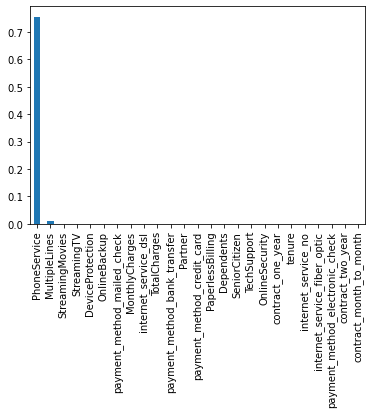

In [68]:
p_values.plot.bar()

### Drop Phone Service

In [69]:
customer_df = customer_df.drop(columns={'PhoneService'})

In [70]:
customer_df

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,internet_service_dsl,internet_service_fiber_optic,internet_service_no,contract_month_to_month,contract_one_year,contract_two_year,payment_method_bank_transfer,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check
0,0,1,0,0.013889,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0.472222,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0.027778,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0.625000,0,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0.027778,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0.333333,1,1,0,1,1,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,1,1,1.000000,1,0,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,1,1,0.152778,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,0.055556,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


### Write to new file: telco_churn_cleaned.csv

In [71]:
# Write DataFrame to CSV File
customer_df.to_csv("telco_churn_cleaned.csv", index=False)